<a href="https://colab.research.google.com/github/zahra-atf/Accenture-Data-Analytics-Virtual-Experience/blob/main/Accenture_virtual_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Load data**

In [115]:
# load data
content = pd.read_csv('/content/drive/MyDrive/Accenture/Content.csv')
reaction = pd.read_csv('/content/drive/MyDrive/Accenture/Reactions.csv')
reactionType = pd.read_csv('/content/drive/MyDrive/Accenture/ReactionTypes.csv')

## **Data Cleaning**

In [4]:
content

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
...,...,...,...,...,...,...
995,995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking,NaN
996,996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...


In [5]:
# drop useless columns in content dataset
content.drop(['Unnamed: 0', 'User ID', 'URL'], inplace=True, axis=1)

In [6]:
# removing rows with missing values
df_content = content.dropna()

In [7]:
# change feature "Type" in content table to be distinct from "Type" in other tables
df_content = df_content.rename(columns={'Type':'TypeContent'})

In [8]:
df_content

,Content ID,TypeContent,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,video,public speaking
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


In [9]:
reaction

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,4/22/21 15:17
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,11/7/20 9:43
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,6/17/21 12:22
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,4/18/21 5:13
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,1/6/21 19:13
...,...,...,...,...,...
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,6/27/20 9:46
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2/16/21 17:17
25550,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,9/12/20 3:54
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,11/4/20 20:08


In [10]:
# drop useless columns in reaction dataset
reaction.drop(['Unnamed: 0', 'User ID'], inplace=True, axis=1)

In [11]:
# removing rows with missing values
df_reaction = reaction.dropna()

In [12]:
df_reaction = df_reaction.rename(columns={'Type':'TypeReaction'})

In [13]:
df_reaction

,Content ID,TypeReaction,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/20 9:43
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,6/17/21 12:22
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,4/18/21 5:13
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,1/6/21 19:13
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,8/23/20 12:25
...,...,...,...
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,6/27/20 9:46
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2/16/21 17:17
25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,9/12/20 3:54
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,11/4/20 20:08


In [14]:
reactionType

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [15]:
# drop useless columns in reactionType dataset
reactionType.drop(['Unnamed: 0', 'Sentiment'], inplace=True, axis=1)

In [16]:
reactionType

,Type,Score
0,heart,60
1,want,70
2,disgust,0
3,hate,5
4,interested,30
5,indifferent,20
6,love,65
7,super love,75
8,cherish,70
9,adore,72


## **Data Modelling**

1. Create a final data set by merging three tables together
2. Figure out the Top 5 performing categories

In [17]:
# merge content and reaction dataframes
df = df_content.merge(df_reaction, how='inner', on='Content ID')

In [18]:
# merge the result of merging content and reaction dataframes with TypeReaction dataframe
df = df.merge(reactionType, how='inner', left_on='TypeReaction', right_on='Type')

In [19]:
df

,Content ID,TypeContent,Category,TypeReaction,Datetime,Type,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,11/7/20 9:43,disgust,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,1/6/21 19:13,disgust,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,4/9/21 2:46,disgust,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,disgust,3/28/21 21:15,disgust,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,disgust,8/4/20 5:40,disgust,0
...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,adore,10/4/20 22:26,adore,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,adore,9/18/20 10:50,adore,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,adore,10/31/20 3:58,adore,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,adore,6/25/20 15:12,adore,72


In [20]:
# double-check the null values
df.isnull().sum()

Content ID      0
TypeContent     0
Category        0
TypeReaction    0
Datetime        0
Type            0
Score           0
dtype: int64

In [21]:
df['Category'].unique()

array(['Studying', 'healthy eating', 'dogs', 'public speaking', 'science',
       'tennis', 'food', 'fitness', 'soccer', 'education', 'studying',
       'travel', 'veganism', 'cooking', 'technology', 'animals',
       'culture', 'Fitness', 'Veganism', 'Travel', 'Animals', 'Education',
       'Soccer', 'Culture', 'Food', 'Science', 'Public Speaking',
       'Healthy Eating', 'Technology'], dtype=object)

Some of items in feature "Category" are written by uppercase letter and others with lowercase letter. So, we have redundent items. I changed all items to lowercase.

In [22]:
df['Category']=df['Category'].str.lower()

In [27]:
df_category = df['Category'].unique()

In [28]:
df_category

array(['studying', 'healthy eating', 'dogs', 'public speaking', 'science',
       'tennis', 'food', 'fitness', 'soccer', 'education', 'travel',
       'veganism', 'cooking', 'technology', 'animals', 'culture'],
      dtype=object)

In [24]:
# save the cleaned data into a csv file
df.to_csv('CleanedData.csv', index = False)

In [92]:
# top 10 most polpular categories
df_category = df.groupby('Category').agg({"Score" : "sum"}).reset_index().sort_values(by='Score', ascending=False).head()

In [93]:
df_category

,Category,Score
0,animals,74965
9,science,71168
7,healthy eating,69339
12,technology,68738
6,food,66676


In [94]:
# calculating the number of posts/reaction per each category
df_sum = df.groupby('Category').agg({"Score" : "sum", "TypeReaction": "count"}).reset_index().sort_values(by='TypeReaction', ascending=False)

In [95]:
df_sum

,Category,Score,TypeReaction
0,animals,74965,1897
9,science,71168,1796
7,healthy eating,69339,1717
6,food,66676,1699
12,technology,68738,1698
2,culture,66579,1676
1,cooking,64756,1664
14,travel,64880,1647
10,soccer,57783,1457
4,education,57436,1433


## **Visualization**

In [29]:
# number of unique categories
len(df_category)

16

Text(0.5, 1.0, 'top 10 most popular categories')

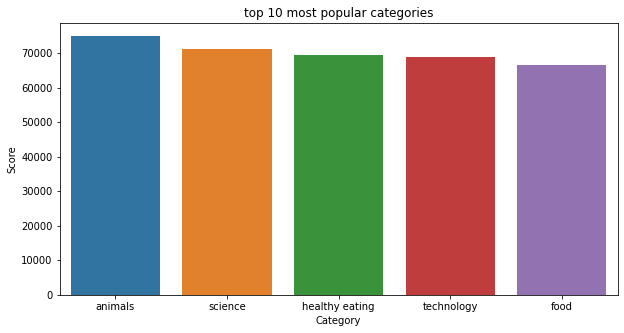

In [85]:
# plotting a graph for top 10 most popular categories

plt.figure(figsize=(10,5))
sns.barplot(x=df_category["Category"], y=df_category["Score"])
plt.title("top 10 most popular categories")

Text(0.5, 1.0, 'categories with the number of posts/reactions')

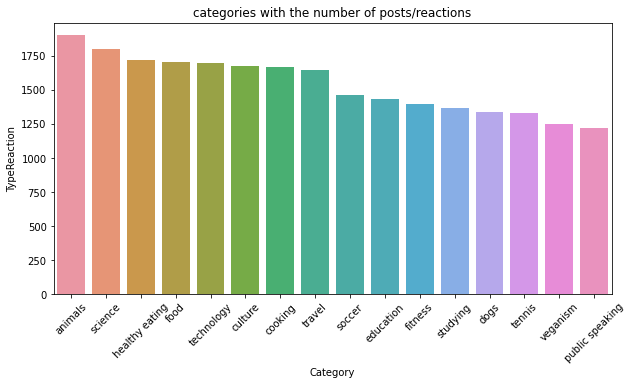

In [96]:
# plotting a graph for number of posts per each category

plt.figure(figsize=(10,5))
sns.barplot(x=df_sum["Category"], y=df_sum["TypeReaction"])
plt.xticks(rotation=45)
plt.title("categories with the number of posts/reactions")

In [100]:
# extracting the month of dates
df["month"] = pd.DatetimeIndex(df["Datetime"]).month

In [101]:
df

,Content ID,TypeContent,Category,TypeReaction,Datetime,Type,Score,month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,11/7/20 9:43,disgust,0,11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,1/6/21 19:13,disgust,0,1
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,4/9/21 2:46,disgust,0,4
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,disgust,3/28/21 21:15,disgust,0,3
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,disgust,8/4/20 5:40,disgust,0,8
...,...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,adore,10/4/20 22:26,adore,72,10
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,adore,9/18/20 10:50,adore,72,9
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,adore,10/31/20 3:58,adore,72,10
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,adore,6/25/20 15:12,adore,72,6


In [107]:
# finding the top months with most number of posts
df_month = df.groupby("month").agg({"Content ID" : "count"}).reset_index().sort_values(by="Content ID", ascending=False).head()

In [108]:
df_month

,month,Content ID
4,5,2138
0,1,2126
7,8,2114
11,12,2092
6,7,2070


Text(0.5, 1.0, 'top months with most number of posts')

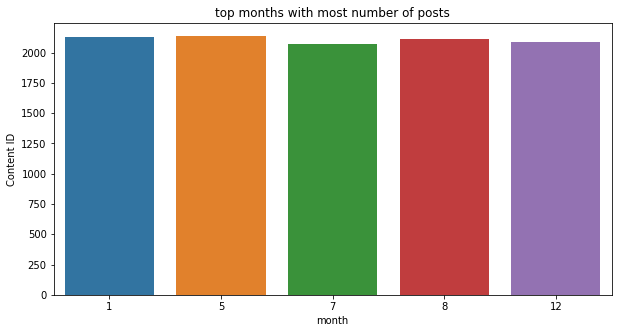

In [114]:
# plotting a graph for top months with most number of posts

plt.figure(figsize=(10,5))
sns.barplot(x=df_month["month"], y=df_month["Content ID"])
plt.title("top months with most number of posts")